In [1]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import numpy as np

In [2]:
# Create list of files to be concatenated
files = [file for file in os.listdir('./Sales_Data')]

# Empty DataFrame to store concatenated csv's
all_months_data = pd.DataFrame()

# Read each csv and concatenate into new DataFrame
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv', index=False)

In [3]:
# Read in concatenated csv
df = pd.read_csv('all_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
# Drop entires where Order ID is null
df.drop(df[df['Order ID'].isnull()].index, inplace = True)

In [6]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
# Drop entries where value = column name [headers were duplicated thorugh out raw data]
df.drop(df[df['Order ID']=='Order ID'].index, inplace = True)

In [8]:
# Export cleansed data as csv
df.to_csv('cleaned_data.csv', index=False)

In [9]:
# Read in cleansed data
df = pd.read_csv('cleaned_data.csv')

In [10]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
# Add datetimecolumn 
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Split purchase address into address, city, state, and zip
df[['Address','City','State']] = df['Purchase Address'].str.split(',',expand=True)

# Split State/Zip column
df[['State','Zip']] = df['State'].str.split(expand=True)

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Address,City,State,Zip
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",917 1st St,Dallas,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston,MA,02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles,CA,90001


#### Question 1: What was the best month of sales? How much was earned that month?

In [13]:
# Create per-order column, to account for quantity * price each

df['Sales Total'] = df['Quantity Ordered'] * df['Price Each']

In [14]:
# Sum sales by month
df.groupby(df['Order Date'].dt.month)['Sales Total'].sum().sort_values(ascending=False)

Order Date
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales Total, dtype: float64

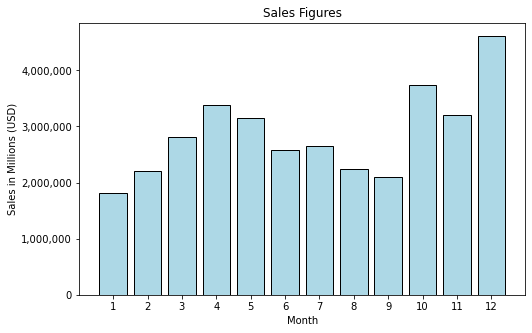

In [15]:
# Graph the above results

months = range(1,13)
results = df.groupby(df['Order Date'].dt.month).sum()

fig, ax = plt.subplots(figsize =(8, 5))
 
# creating the bar plot
plt.bar(months, results['Sales Total'], color = 'lightblue', edgecolor='black',
        width = 0.8)

# Change y-axis from scientific notation to int
ax.ticklabel_format(axis='y', style='plain')

# Add ',' to dollar values in y-axis
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(months)
plt.ylabel('Sales in Millions (USD)')
plt.xlabel('Month')
plt.title('Sales Figures')
plt.show()

#### Question 2: Which U.S. city had the highest number of sales?

In [16]:
# Sum sales by month
df.groupby('City')['Sales Total'].sum().sort_values(ascending=False)

City
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
 Dallas           2767975.40
 Seattle          2747755.48
 Portland         2320490.61
 Austin           1819581.75
Name: Sales Total, dtype: float64

In [108]:
# Create new df from aggregates
result2 = df.groupby('City').sum()

# Create cities column from indexes
result2['Cities'] = result2.index

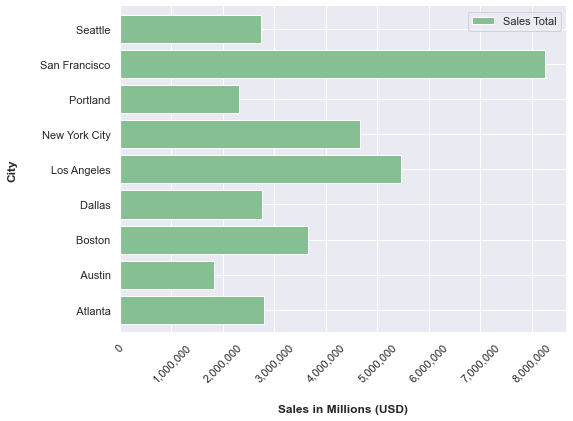

In [109]:
# Create horizontal barplot for above data
ax = result2.plot(kind='barh', 
                  x='Cities', 
                  y='Sales Total', 
                  figsize=(8, 6), color='#86bf91', zorder=2, width=0.8)
# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set x-axis label
ax.set_xlabel("Sales in Millions (USD)", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("City", labelpad=20, weight='bold', size=12)

# Change x-axis from scientific notation to int
ax.ticklabel_format(axis='x', style='plain')

# Add ',' to dollar values in x-axis
ax.get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=45)
plt.show()

#### Question 3: What is the opitmal time to display advertisements to maximize likelyhood of customers' buying products?

In [19]:
# Sum sales by Time
df.groupby(df['Order Date'].dt.hour)['Sales Total'].sum().sort_values(ascending=False)

Order Date
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
15    1941549.60
16    1904601.31
9     1639030.58
22    1607549.21
8     1192348.97
23    1179304.44
7      744854.12
0      713721.27
1      460866.88
6      448113.00
2      234851.44
5      230679.82
4      162661.01
3      145757.89
Name: Sales Total, dtype: float64

In [110]:
# Create new df from aggregates
result3 = df.groupby(df['Order Date'].dt.hour).sum()

# Create cities column from indexes
result3['Order Hour'] = result3.index

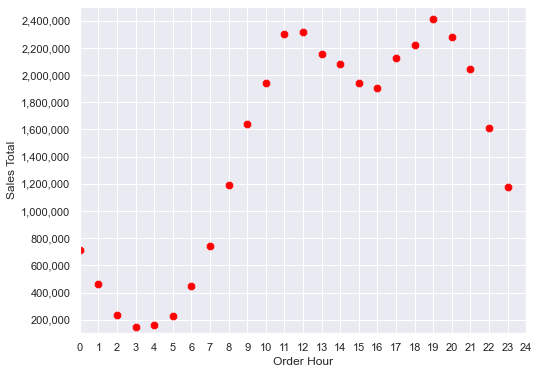

In [111]:
ax = result3.plot(kind='scatter', 
                  x='Order Hour', 
                  y='Sales Total',
                  s=50,
                  figsize=(8, 6), color='red',
                  grid=True,
                  marker='8')

# Specify x-axis tick amrk interval
loc = ticker.MultipleLocator(base=1)
ax.xaxis.set_major_locator(loc)

# Specify y-axis tick amrk interval
loc2 = ticker.MultipleLocator(base=200000)
ax.yaxis.set_major_locator(loc2)

# Change y-axis from scientific notation to int
ax.ticklabel_format(axis='y', style='plain')

# Add ',' to dollar values in y-axis
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlim(0,24)
plt.ylim(100000,2500000)
plt.show()

# Recommended marketing hours are 11am to 12pm and 7pm (19)

#### Question 4: Which products are most often sold together?

In [112]:
# Create new data frame containing only entries with duplicated Order IDs
df2 = df[df['Order ID'].duplicated(keep=False)]

# Create new column that stores all Products for a given Order ID
df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop duplicated Order ID/Grouped combinations and isolate needed columns
df2 = df2[['Order ID','Grouped']].drop_duplicates()

C:\Users\Dan\AppData\Local\Temp\ipykernel_23588\2134498684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [113]:
from itertools import combinations
from collections import Counter

# To Find the combination of most common TWO items sold together
count_2 = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count_2.update(Counter(combinations(row_list, 2)))
    
for key, value in count_2.most_common(10):
    print(f"{key[0]} + {key[1]} : Purchased {value} times.")

iPhone + Lightning Charging Cable : Purchased 1005 times.
Google Phone + USB-C Charging Cable : Purchased 987 times.
iPhone + Wired Headphones : Purchased 447 times.
Google Phone + Wired Headphones : Purchased 414 times.
Vareebadd Phone + USB-C Charging Cable : Purchased 361 times.
iPhone + Apple Airpods Headphones : Purchased 360 times.
Google Phone + Bose SoundSport Headphones : Purchased 220 times.
USB-C Charging Cable + Wired Headphones : Purchased 160 times.
Vareebadd Phone + Wired Headphones : Purchased 143 times.
Lightning Charging Cable + Wired Headphones : Purchased 92 times.


In [47]:
# To Find the combination of most common THREE items sold together
count_3 = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count_3.update(Counter(combinations(row_list, 3)))
    
for key, value in count_3.most_common(10):
    print(f"{key[0]} + {key[1]} + {key[2]}: Purchased {value} times.")

Google Phone + USB-C Charging Cable + Wired Headphones: Purchased 87 times.
iPhone + Lightning Charging Cable + Wired Headphones: Purchased 62 times.
iPhone + Lightning Charging Cable + Apple Airpods Headphones: Purchased 47 times.
Google Phone + USB-C Charging Cable + Bose SoundSport Headphones: Purchased 35 times.
Vareebadd Phone + USB-C Charging Cable + Wired Headphones: Purchased 33 times.
iPhone + Apple Airpods Headphones + Wired Headphones: Purchased 27 times.
Google Phone + Bose SoundSport Headphones + Wired Headphones: Purchased 24 times.
Vareebadd Phone + USB-C Charging Cable + Bose SoundSport Headphones: Purchased 16 times.
USB-C Charging Cable + Bose SoundSport Headphones + Wired Headphones: Purchased 5 times.
Vareebadd Phone + Bose SoundSport Headphones + Wired Headphones: Purchased 5 times.


#### Question 5: Which product sold the most? Why?

In [49]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Address,City,State,Zip,Sales Total
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",917 1st St,Dallas,TX,75001,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston,MA,02215,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles,CA,90001,11.99


In [50]:
df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [114]:
# Create new df from aggregates
products = df.groupby('Product').sum()

# Create cities column from indexes
products['Product'] = products.index

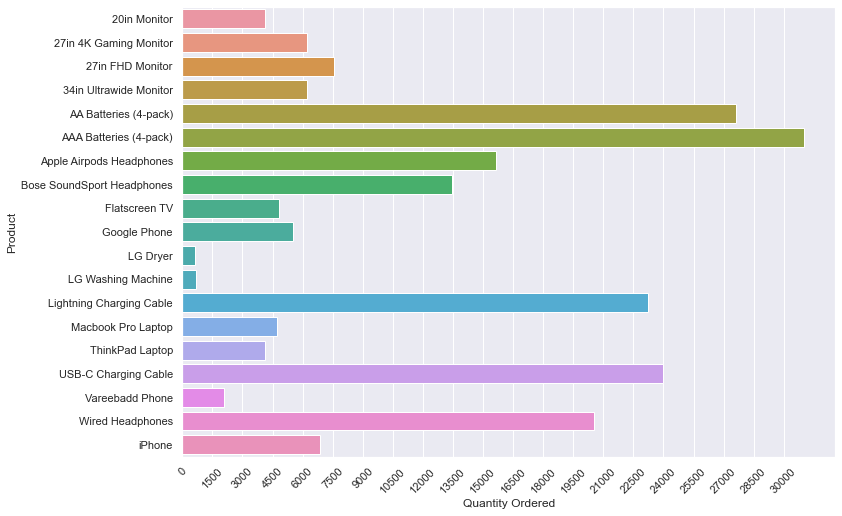

In [115]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(data=products,
            x = 'Quantity Ordered',
            y = 'Product')

plt.xticks(range(0,31000,1500))
plt.xticks(rotation=45)
plt.show()

C:\Users\Dan\AppData\Local\Temp\ipykernel_23588\3715623572.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation=60, size=12)


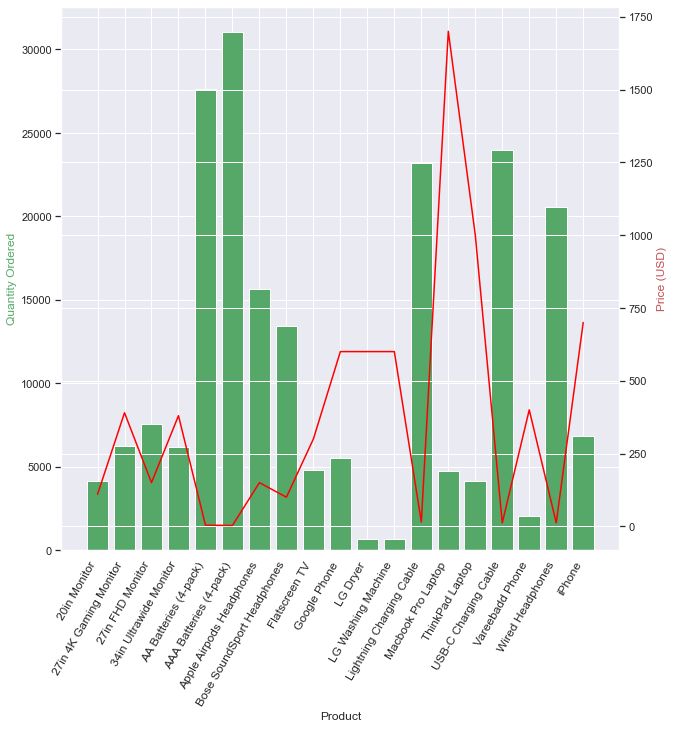

In [107]:
# Create Overlay chart to show Qty of Products sold over average price

product_group = df.groupby('Product')
qty_ordered = product_group.sum()['Quantity Ordered']

products = [product for product,df in product_group]

prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
plt.rcParams["figure.figsize"] = (10,10)

ax2 = ax1.twinx()
ax1.bar(products, qty_ordered, color='g')
ax2.plot(products, prices, 'red')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price (USD)', color='r')

ax1.set_xticklabels(products, rotation=60, size=12)
plt.setp(ax1.xaxis.get_majorticklabels(), ha='right')
plt.show()
